<img src="./unal.png" align=left width="150" height="150"></img>



$\,$
---

<h2 align="center">DIAGNÓSTICO DEL CÁNCER DE MAMA EN EL ESTADO DE WISCONSIN</h2>
<h3 align="center">ANÁLISIS MULTIVARIADO (Método no paramétrico basado en profundidad) </h3>


### 

---

Teniendo en cuenta que el análisis multivariado clásico se basa en gran medida en diversos supuestos como el de la normalidad, existen muchas situaciones en la que su cumplimiento es de poca frecuencia y más si se tratase en su forma multivariada, actualmente existe otro tipo enfoque para abordar este tipo de problemas como lo es el enfoque no paramétrico basado en profundidad,  el cual será abordado en su parte fundamental en el análisis de los diagnósticos de cáncer de Wisconsin. Además se de ser parte articulador permitirá como lo señala Liu, R., Parelius, J. y  Singh, K. (1999) en determinar características cuantitativas, gráficas multivariadas de distribución junto con métodos de inferencia.

Para realizar una descripción de la distribución multivariante,  surge principalmente el problema de poder determinar una forma de ordenación entre objetos de $R^p$, esta necesidad conlleva el gran aporte del concepto de profundidad el cual según Zuo y Serfling. (2000) es una función D (x; P) que proporciona una ordenación hacia el centro.  Tukey (1975) uno de los pioneros en este campo propone una profundidad de **medio espacio** y sugiere su papel en la definición de estadísticas multivariadas de orden y rango univariable a través de **contornos**  inducidos por la profundidad.(p.1). Por consiguiente se presenta la siguiente definición la cual sera artifice de los procedimientos subsecuentes:

**Función de profundidad**: Dada una distribución de probabilidad P en $R^d$, una función de profundidad es una función acotada  que asigna a cada punto de $R^d$ su grado de centralidad respecto de P.
$$D\left ( \;. \; ; P \right ) : \;R^d \; \mapsto \;[0,1]$$ 
La función suele llamarse de profundidad se satisface las siguientes propiedades: 

* $D(Ax+b ; P_{AX+b})=D(x;P_x)$ para cualquier x en $R^{d}$, cualquier matriz de dimensión $d\times d$ no singular y cualquier vector b de dimensión d, donde donde $F_x$ es la función de distribución del vector aleatorio X.
* $Lim_{\left \| x \right \| \rightarrow \infty } = D(x;P)=0$. 
* $D(\theta ; P) Sup_{x \in R^d}D(x ; P)$ Para todo P con $\theta$ el centro.
* Si $\theta$ es el punto con mayor profundidad entonces: $D(x;P) \leqslant D(\theta + \lambda(x-\theta);P)$ para cualquier $0 \leq  \lambda \leq  1$.
*  El conjunto de puntos cuya profundidad es al menos $\alpha$ es cerrado. $D_{\alpha}=D_{\alpha}(P)= \left \{ x\in R^d : D(x;P) \geq  \alpha \right \}$, $D_{\alpha}$ constituye una región central y aveces se le considera $\alpha- trimmed$.

La Profundidad de datos y ordenación de observaciones multivariadas puede realizarse por medio de cualquier función de profundidad, de las cuales se destacan:

**Función profundidad Mahalanobis $M_{MAH}$** está definida como:
 
\begin{equation*}
 M_{MAH}(x;P) = \left [1+ (x- \mu) \sum\nolimits_{F}^{-1} (x- \mu)\right ]^{-1} 
\end{equation*}

Donde $\mu$ y $\sum\nolimits_{F} $ son el vector de medias y la matriz de dispersión de F respectivamente. La versión muestral de $M_{H} D $ es obtenida remplazando $\mu_F$ y $\sum\nolimits_{F} $ por sus estimaciones muestrales.

**Función profundidad Euclidiana $D_{EUK}$** está definida como:

\begin{equation*}
  D_{EUK}(x;P) = \left [1+ \left \| x -\overline{x} \right \|\right ]^{-1} 
\end{equation*}

**Projection depth** $ D(x,P)_{PRO}$ Para todo $x \in R^d$ con $d>1$

\begin{equation*}
  PD_{F}(x)= \left [ 1+ sup_{||u||=1}
\frac{|u^{'}x-Med(u^{'} X)|}{MAD(u^{'}X)}\right ]^{-1}
\end{equation*}

A continuación se presentan las distancias por medio de las funciones Mhalanobis, Euclidea, Profundidad y de Tuckey:


In [2]:
setwd("C:\\Users\\analisis multivariado\\TALLER1FINAL")
databiopsia<-read.csv("data.csv",sep = ",")

#organizando los datos 
A<-databiopsia[,c("diagnosis","compactness_mean","smoothness_mean","symmetry_mean","area_mean")]
databiopsia <- data.frame(A)
colnames(databiopsia)<-c("diagnosis", "compactness", "smoothness","symmetry", "area")
head(databiopsia, n=10)

diagnosis,compactness,smoothness,symmetry,area
M,0.27760,0.11840,0.2419,1001.0
M,0.07864,0.08474,0.1812,1326.0
M,0.15990,0.10960,0.2069,1203.0
M,0.28390,0.14250,0.2597,386.1
M,0.13280,0.10030,0.1809,1297.0
M,0.17000,0.12780,0.2087,477.1
M,0.10900,0.09463,0.1794,1040.0
M,0.16450,0.11890,0.2196,577.9
M,0.19320,0.12730,0.2350,519.8
M,0.23960,0.11860,0.2030,475.9


In [11]:
                            #-------------------------------------
                            #     Funciones de  Profundidad
                            #------------------------------------

require(DepthProc)

x<-as.matrix(databiopsia[,2:4])
#----------Euclidean Depth 
Euc<-depthEuclid(x, x);  D.Euclid<-Euc[1:20]
Mah<-depthMah(x, x);   D.Mah<-Mah[1:20]

#------------Depth median
a<-depthMedian(x, depth_params = list(method = "Euclidean")) # mediana de la medida depth
b<-depthMedian(x, depth_params = list(method = "Mahalanobis"))
depthMedian(x, depth_params = list(method = "Tukey"))
d<-depthMedian(x, depth_params = list(method = "Projection"))


compactness  smoothness    symmetry 
    0.10220     0.09428     0.17690

In [4]:

# depthMedian works with object of class Depth
dp <- depth(x)
depthMedian(dp)

#---------------proyeccion depth
Proyeccion<-depthProjection(x, x, ndir = 2000)   ;D.Poyeccion<-Proyeccion[1:20]

#---------------profundidad de tuckey
Tukey<-depthTukey(x, ndir = 2000)  ; D.Tuckey<-Tukey[1:20]

Distances<-cbind(D.Euclid,D.Mah,D.Poyeccion,D.Tuckey)
require(xtable)
xtable(Distances)


compactness  smoothness    symmetry 
     0.1034      0.0978      0.1752

Loading required package: xtable


D.Euclid,D.Mah,D.Poyeccion,D.Tuckey
0.9669370,0.07892719,0.1301524,0.005272408
0.9992051,0.49669069,0.3741843,0.154657293
0.9960908,0.43319474,0.2959186,0.117750439
0.9610408,0.06698156,0.1316273,0.003514938
0.9991752,0.68211689,0.4149668,0.205623902
0.9939786,0.16320244,0.2219262,0.014059754
0.9999722,0.93180339,0.5561388,0.332161687
0.9944266,0.25250732,0.2646482,0.047451670
0.9883848,0.15086609,0.2074934,0.015817223
0.9810977,0.11837467,0.1694970,0.005272408


Para hacer una distinción de adentro hacia afuera, se calculan las profundidades de toda la muestra $\{x_1,...,x_n\}$, por consiguiente se procede a ordenar de menor a mayor, sea el punto $X_{[i]}$ el punto de la muestra asociado con la mayor profundidad (mediana). A continuación se presenta la tabla anterior que presenta las medianas dependiendo del tipo de función usada.

In [5]:
rbind(a,b,d)

,compactness,smoothness,symmetry
a,0.1041,0.10080,0.1813
b,0.1117,0.09746,0.1807
d,0.1034,0.09780,0.1752


Se puede observar que las medianas dependiendo de la función de profundidad son diferentes, sin embargo no varían mucho una de las otras.

### Contornos de profundidad y bagplot

En lo que se refiere a la ordenación de observaciones por medio de la profundidad, López, A. (2010) establece que existen métodos gráficos que proporcionan la posibilidad de llevar a cabo análisis estadísticos exploratorios, dando lugar a diagramas de puntos y a curvas. No obstante el uso de representaciones gráficas sera el objetivo para caracterizar la distribución de los datos del diagnostico de cáncer; luego se da lugar al Bagplot el cual según Rousseeuw, Ruts, y Tukey (1999) es una generalización del boxplot para el caso bivariado y lleva consigo la ubicación de las observaciones a un punto central llevando al concepto de profundidad.

Para lograr un análisis de las observaciones se usará el uso de representaciones gráficas entre ellas el Bagplot (ver las siguientes figuras) el cual es desarrollado por la librería **DepthProc** el bagplot permite visualizar medidas estadísticas bivariadas diagnostico de cáncer de mama en Wisconsin permitiendo, como lo destaca Rousseeuw et al., (1999) visualizar la ubicación, propagación, correlación, asimetría y colas de los datos (P.1). En este orden de ideas, se representa un bagplot por cada par de variables.

* El la siguiente figura se evidencia el bagplot para las variables Compacticidad y Suavidad, la región central (verde fluorescente) contiene el {50\%} de los datos, que es el equivalente al boxplot en el caso univariado. Dentro de la región verde clara  están los datos considerados intrínsecos a la nube de puntos.

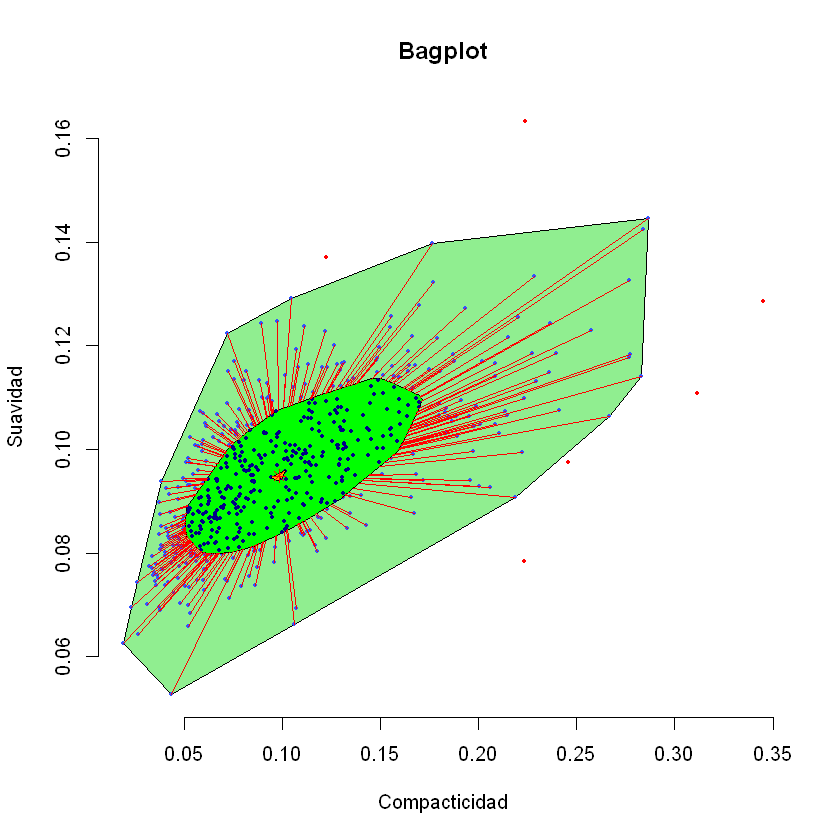

In [10]:

#Carga el paquete aplpack
#install.packages("aplpack")
library(aplpack) #Libreria para realizar el bagplot

#Bagplot
#par(mfrow=c(1,2))
bagplot(databiopsia$compactness, databiopsia$smoothness,col.baghull="green", col.loophull="lightgreen", main = "Bagplot", xlab="Compacticidad", ylab="Suavidad")

* Para las variables Suavidad y asimetría se presenta el siguiente bagplot, el cual genera una forma asimétrica especificándose por la mediana de las observaciones 

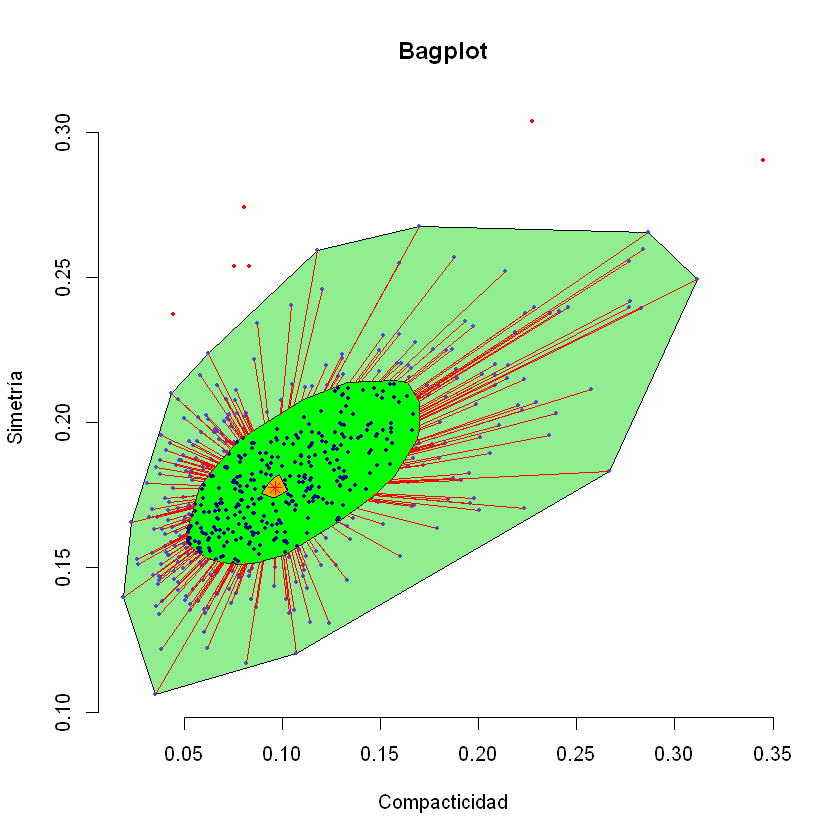

In [7]:
#Bagplot
bagplot(databiopsia$compactness, databiopsia$symmetry,col.baghull="green", col.loophull="lightgreen", main = "Bagplot", xlab="Compacticidad", ylab="Simetría")

* En referencia a los bagplot presentado en la figura siguiente el cual hace alusión a las variables Suavidad y simetría, se logra observar que es el que  presenta mayor simetría con respecto al punto mas profundo, mostrándose la menor cantidad de valores atípicos.

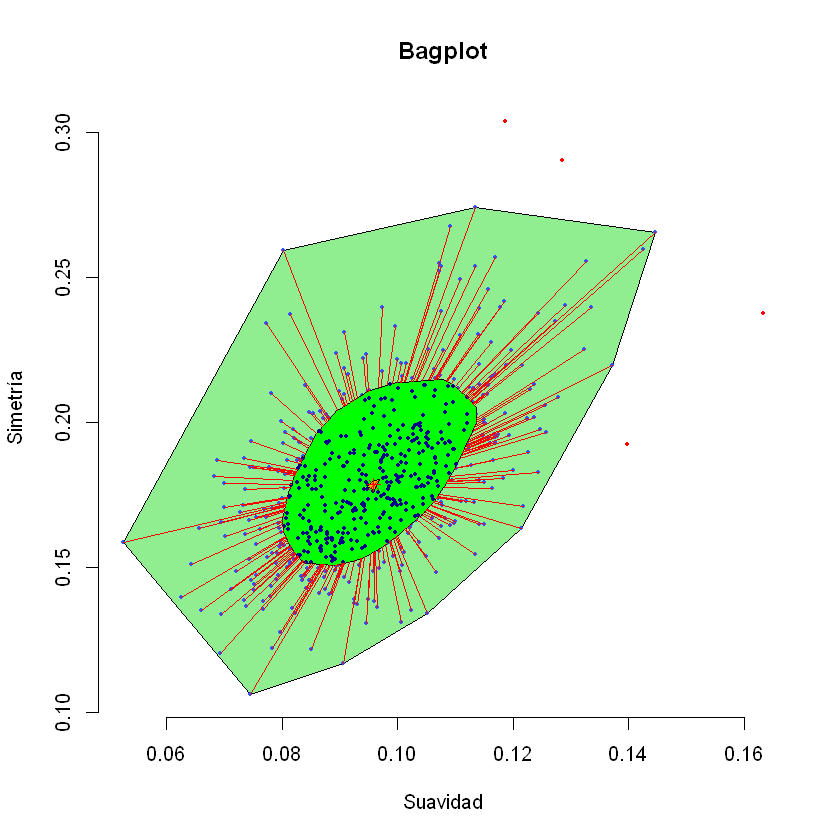

compactness,smoothness,symmetry
0.27760,0.11840,0.2419
0.07864,0.08474,0.1812
0.15990,0.10960,0.2069
0.28390,0.14250,0.2597
0.13280,0.10030,0.1809
0.17000,0.12780,0.2087
0.10900,0.09463,0.1794
0.16450,0.11890,0.2196
0.19320,0.12730,0.2350
0.23960,0.11860,0.2030


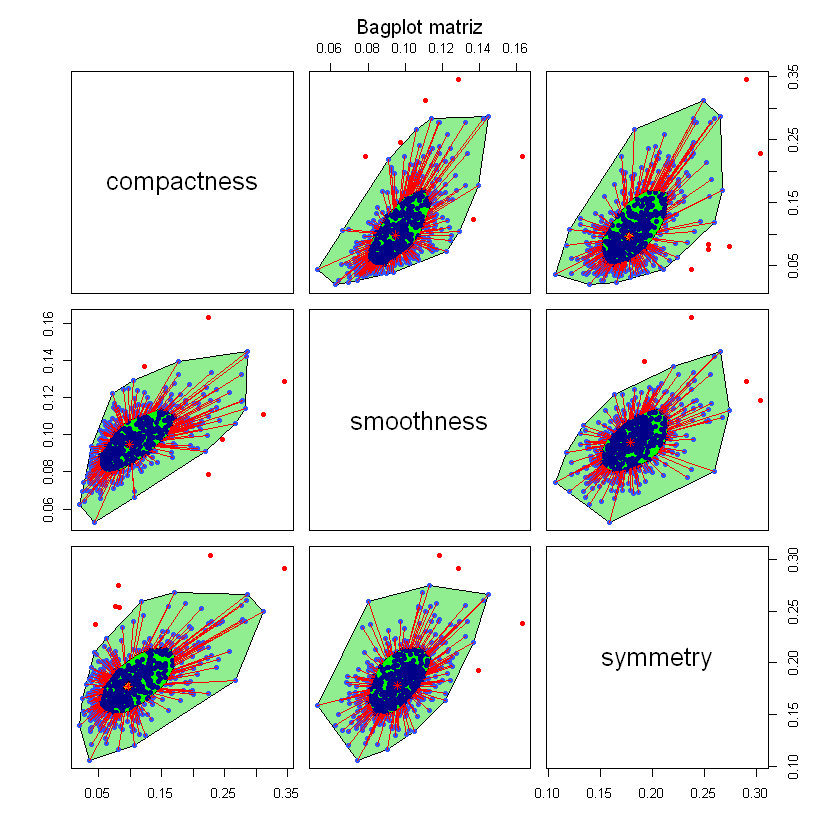

In [8]:
#Bagplot
bagplot(databiopsia$smoothness, databiopsia$symmetry,col.baghull="green", col.loophull="lightgreen", main = "Bagplot", xlab="Suavidad", ylab="Simetría")

bagplot.pairs(databiopsia[,2:4],col.baghull="green", col.loophull="lightgreen",main = "Bagplot matriz")


No obstante, cabe aclarar que fuera de la región del bagplot se ubican los datos outlier de la distribución bivariada conjunta (pares de variables), sin embargo, para determinar los outliers (en general) de la distribución multivariada conjunta ha de establecerse una comparación más general. Adicionalmente, cabe resaltar que el punto más profundo es un estimador de la mediana poblacional como se mencionó anteriormente este punto se resalta en el gráfico como punto rojo más central de la representación.

Para caracterizar la distribución multivariada se realizan la prueba de Mardia Skewness para identificar si la distribución multivariada es normal, usando la librería **MVN** se obtienen los resultados los cuales conducen a que las observaciones no proviene de una normal multivariada. Lo cual se esperaba puesto que las distribuciones univariadas no eran normales.

In [27]:
# test de normalidad
# test de Mardia en MVN
library("MVN")
result <- mvn(data = databiopsia[,2:4], mvnTest = "mardia")
result$multivariateNormality

Test,Statistic,p value,Result
Mardia Skewness,235.568241179259,5.83465806202843e-45,NO
Mardia Kurtosis,12.9061675554888,0,NO
MVN,NA,NA,NO


In [32]:
## Test de Normalidad Multivariada 
##  Ho: Los datos siguen una Distribución Normal Multivariada 
## ---------------------------------------------------------------- 
## Prueba de Mardia - Asimetría 
##  Asimetría Multivariada = 2.484024
##  Valor de TAM = 237.4351
##  Valor p= 2.367177e-45
## ---------------------------------------------------------------- 
## Prueba de Mardia - Curtosis 
##  Curtosis Multivariado = 20.926957
##  Valor de TKM = 166.5692
##  Valor p= 4.154701e-38
mardia.df<-function(datos){
  n<-nrow(datos)
  k<-ncol(datos)
  
  x<-as.matrix(datos)
  media<-colMeans(datos)
  matriz.media<-matrix(media,nrow=n,ncol=k,byrow=TRUE)

  S<-cov(datos)*(n-1)/n
  SI<-solve(S)   #Inversa de la matriz de covarianzas

  distm<-((x-matriz.media)%*%SI)%*%t((x-matriz.media))
      
  gl<-k*(k+1)*(k+2)/6
  c<-(n+1)*(n+3)*(k+1)/(n*((n+1)*(k+1)-6))
  
  AM<-sum(distm^3)/n^2
  
  #Muestras Pequeñas
  TAM<-n*c/6*AM           
  valor_p1<-pchisq(TAM,gl,lower.tail = FALSE)
    if (valor_p1<0.05){
      test1 <- "No Normalidad"
     } else {
        test1 <- "Normalidad"
    }
  KM<-sum((diag(distm))^2)/n
  TKM<-(KM-k*(k+2))*sqrt(n/(8*k*(k+2)))
  TKM2<-TKM^2
  valor_p2<-pchisq(TKM2,1,lower.tail = FALSE)
     if (valor_p2<0.05){
      test2 <- "No Normalidad"
     } else {
        test2 <- "Normalidad"
    } 
  df<-data.frame(Prueba=c("Prueba de Asimetría","Prueba de Curtosis"),Medida=c(AM,KM),Estadístico=c(TAM,TKM2),valor_p=c(valor_p1,valor_p2),Conclusión=c(test1,test2))
  df
  }

mardia.df(databiopsia[,2:4])

Prueba,Medida,Estadístico,valor_p,Conclusión
Prueba de Asimetría,2.484024,237.4351,2.367177e-45,No Normalidad
Prueba de Curtosis,20.926957,166.5692,4.154701e-38,No Normalidad


Dado lo anterior se concluye que la distribucion multivariada no es normal trivariada.

In [44]:
#result <- mvn(databiopsia[,2:3], mvnTest = "hz", multivariatePlot = "persp")
# contour plot

#result <- mvn(databiopsia[,2:3], mvnTest = "hz", multivariatePlot = "contour")
#result <- mvn(databiopsia[,3:4], mvnTest = "hz", multivariatePlot = "contour")

#para encontrar outliers
#result <- mvn(data = databiopsia[,2:4], mvnTest = "hz", multivariateOutlierMethod = "quan")
#result <- mvn(data=databiopsia[,2:4],mvnTest="hz",multivariateOutlierMethod="adj")

Projection to the first and second robust principal components.
Proportion of total variation (explained variance): 0.8773025


index
FALSE  TRUE 
  538    31 

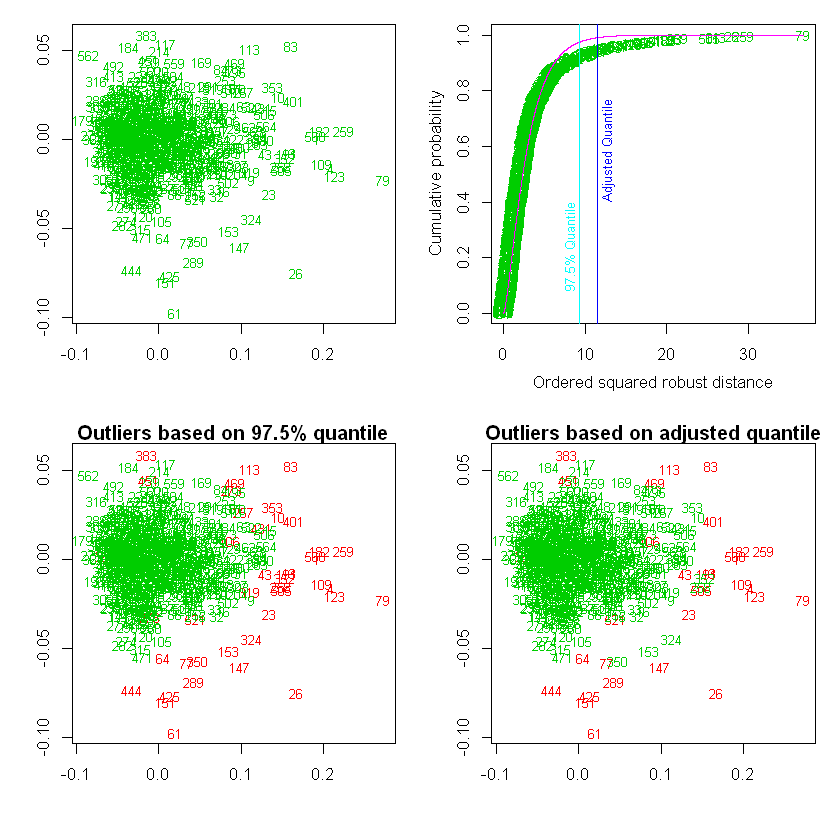

In [30]:
                  #*--------------------------------
#                  DETECCIÓN DE OUTLIERS MULTIVARIADOS
                  #-----------------------------------
library(mvoutlier)
#outliers <- aq.plot(databiopsia[, 2:4])

index<-data.frame(aq.plot(databiopsia[, 2:4],quan=0.9,alpha=0.1)$outliers)
table(index)



En consecuencia los outliers multivariados detectados por medio del enfoque no parametrico basado en profundidad son:  

In [18]:
EE<-data.frame(outliers,seq(1,569))
EE<-subset(data.frame(outliers,seq(1,569)),outliers=="TRUE")
atipicos<-EE[,2]
as.vector(atipicos)
databiopsia[c(atipicos),2:4]

[1]   1   4  10  13  23  26  43  61  64  77  79  83 106 109 113 123 147 151 182
[20] 191 257 259 273 289 353 383 401 425 431 444 451 469 505 521 568

,compactness,smoothness,symmetry
1,0.27760,0.11840,0.2419
4,0.28390,0.14250,0.2597
10,0.23960,0.11860,0.2030
13,0.24580,0.09740,0.2397
23,0.21350,0.10730,0.2521
26,0.22760,0.11860,0.3040
43,0.21900,0.09081,0.2310
61,0.08061,0.11340,0.2743
64,0.08751,0.07721,0.2341
77,0.10470,0.12910,0.2403
